## Importing the necessary files

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the CSV
telmedData = pd.read_csv("./telemedicine_use.csv")
# Checking the shape of the CSV file
telmedData.shape

(1066, 15)

In [3]:
# Check the heads of the data
telmedData.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag
0,Adults Who Had Appointment with Health Profess...,National Estimate,United States,United States,3.1,28,Apr 14 - Apr 26,04/14/2021,04/26/2021,25.7,25.0,26.4,25.0 - 26.4,NaN,NaN
1,Adults Who Had Appointment with Health Profess...,By Age,United States,18 - 29 years,3.1,28,Apr 14 - Apr 26,04/14/2021,04/26/2021,21.6,19.2,24.1,19.2 - 24.1,NaN,NaN
2,Adults Who Had Appointment with Health Profess...,By Age,United States,30 - 39 years,3.1,28,Apr 14 - Apr 26,04/14/2021,04/26/2021,23.1,21.7,24.5,21.7 - 24.5,NaN,NaN
3,Adults Who Had Appointment with Health Profess...,By Age,United States,40 - 49 years,3.1,28,Apr 14 - Apr 26,04/14/2021,04/26/2021,25.7,24.2,27.3,24.2 - 27.3,NaN,NaN
4,Adults Who Had Appointment with Health Profess...,By Age,United States,50 - 59 years,3.1,28,Apr 14 - Apr 26,04/14/2021,04/26/2021,26.3,24.6,28.1,24.6 - 28.1,NaN,NaN


## Data Cleanup, Data type Corrections, Data Refactoring

In [4]:
# Checking info of each columns
telmedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               1066 non-null   object 
 1   Group                   1066 non-null   object 
 2   State                   1066 non-null   object 
 3   Subgroup                1066 non-null   object 
 4   Phase                   1066 non-null   float64
 5   Time Period             1066 non-null   int64  
 6   Time Period Label       1066 non-null   object 
 7   Time Period Start Date  1066 non-null   object 
 8   Time Period End Date    1066 non-null   object 
 9   Value                   1009 non-null   float64
 10  Low CI                  1009 non-null   float64
 11  High CI                 1009 non-null   float64
 12  Confidence Interval     1009 non-null   object 
 13  Quartile Range          714 non-null    object 
 14  Suppression Flag        13 non-null     

In [5]:
# Checking for Null Values
telmedData.isnull().sum()

Indicator                    0
Group                        0
State                        0
Subgroup                     0
Phase                        0
Time Period                  0
Time Period Label            0
Time Period Start Date       0
Time Period End Date         0
Value                       57
Low CI                      57
High CI                     57
Confidence Interval         57
Quartile Range             352
Suppression Flag          1053
dtype: int64

In [6]:
# Replace all null values with 0
telmedData.fillna(0, inplace=True, downcast='infer')
# Changing the data type of relevant datetype columns
telmedData['Time Period Start Date'] = pd.to_datetime(telmedData['Time Period Start Date'])
telmedData['Time Period End Date'] = pd.to_datetime(telmedData['Time Period End Date'])

In [7]:
# Making sure no null values exists
telmedData.isnull().sum()

Indicator                 0
Group                     0
State                     0
Subgroup                  0
Phase                     0
Time Period               0
Time Period Label         0
Time Period Start Date    0
Time Period End Date      0
Value                     0
Low CI                    0
High CI                   0
Confidence Interval       0
Quartile Range            0
Suppression Flag          0
dtype: int64

In [8]:
del telmedData['Time Period Label']
del telmedData['Confidence Interval']
# telmedData.drop(columns=['Time Period Start Date', 'Time Period End Date', 'Time Period Label', 'Confidence Interval'], axis=1)
# Making sure the date time column data type has been changed
telmedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Indicator               1066 non-null   object        
 1   Group                   1066 non-null   object        
 2   State                   1066 non-null   object        
 3   Subgroup                1066 non-null   object        
 4   Phase                   1066 non-null   float64       
 5   Time Period             1066 non-null   int64         
 6   Time Period Start Date  1066 non-null   datetime64[ns]
 7   Time Period End Date    1066 non-null   datetime64[ns]
 8   Value                   1066 non-null   float64       
 9   Low CI                  1066 non-null   float64       
 10  High CI                 1066 non-null   float64       
 11  Quartile Range          1066 non-null   object        
 12  Suppression Flag        1066 non-null   int64   

In [9]:
# Let's check the description of the data. 
# [P.S - As there is a column with datatype datetime so it won't be described in future unless this is to be considered as numeric]
telmedData.describe(include='all', datetime_is_numeric=True)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Quartile Range,Suppression Flag
count,1066,1066,1066,1066,1066.000000,1066.000000,1066,1066,1066.000000,1066.000000,1066.000000,1066.0,1066.000000
unique,2,12,52,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,NaN
top,Households With Children Where Any Child Had A...,By State,United States,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
freq,541,714,352,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,352.0,NaN
mean,NaN,NaN,NaN,NaN,2.944465,29.761726,2021-05-29 14:38:02.926829312,2021-06-10 16:36:55.384615424,21.182552,17.234334,25.720356,NaN,0.012195
min,NaN,NaN,NaN,NaN,-1.000000,1.000000,2021-04-14 00:00:00,2021-04-26 00:00:00,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,3.100000,29.000000,2021-04-28 00:00:00,2021-05-10 00:00:00,18.400000,13.400000,22.800000,NaN,0.000000
50%,NaN,NaN,NaN,NaN,3.100000,31.000000,2021-05-26 00:00:00,2021-06-07 00:00:00,22.200000,18.100000,26.300000,NaN,0.000000
75%,NaN,NaN,NaN,NaN,3.100000,33.000000,2021-06-23 00:00:00,2021-07-05 00:00:00,25.500000,21.900000,30.300000,NaN,0.000000
max,NaN,NaN,NaN,NaN,3.200000,34.000000,2021-07-21 00:00:00,2021-08-02 00:00:00,41.300000,39.200000,49.500000,NaN,1.000000


In [10]:
# SKIP: Checking the unique value counts for internal purpose
# telmedData["Time Period End Date"].value_counts()
# telmedData.nunique()

---------------------------
#### Observations after data refactoring:
---------------------------
1. Total 1066 row is present in this csv
2. Two unique indicators are present
3. "Households with children..." have consulted telemedicine the most (541)
4. Similarly Group wise "By State" and State and Sub Group wise "United States" frequency is the highest for telemedicine consultation

## Data Analysis

### Ploting the charts

In [36]:
# Checking Corelation of the data
telmedData.corr()
# sns.set_style("whitegrid");
# sns.FacetGrid(telmedData, hue="Group", height=3).map(plt.scatter, "Indicator", "Group").add_legend();
# plt.show();

,Phase,Time Period,Value,Low CI,High CI,Suppression Flag
Phase,1.000000,0.957307,0.601454,0.521260,0.632671,0.025270
Time Period,0.957307,1.000000,0.511935,0.437018,0.546515,0.028709
Value,0.601454,0.511935,1.000000,0.953777,0.950979,-0.328640
Low CI,0.521260,0.437018,0.953777,1.000000,0.814581,-0.285252
High CI,0.632671,0.546515,0.950979,0.814581,1.000000,-0.345130
Suppression Flag,0.025270,0.028709,-0.328640,-0.285252,-0.345130,1.000000


<AxesSubplot:>

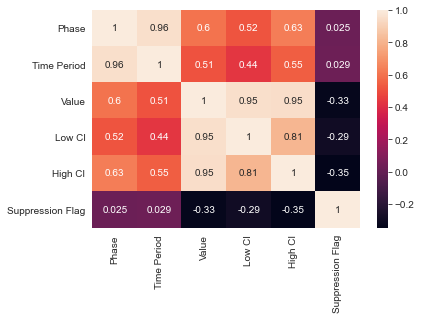

In [37]:
# Visulizing Corelation of the data
corelation = telmedData.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

#### Observation
1. If the analysing continues between High CI and Low CI then it can be seen the data is coherrently correlated.
2. Here the data Period and Timeframe is sharing the highest correlation but both falls under similar category i.e. timeframe, so from the "Indicators" aspect nothing can be predicted.
3. Here in the data there the survey went on two type of people who took the appointment. i.e. Children and Adult

### Visualizing via histograms on different aspects

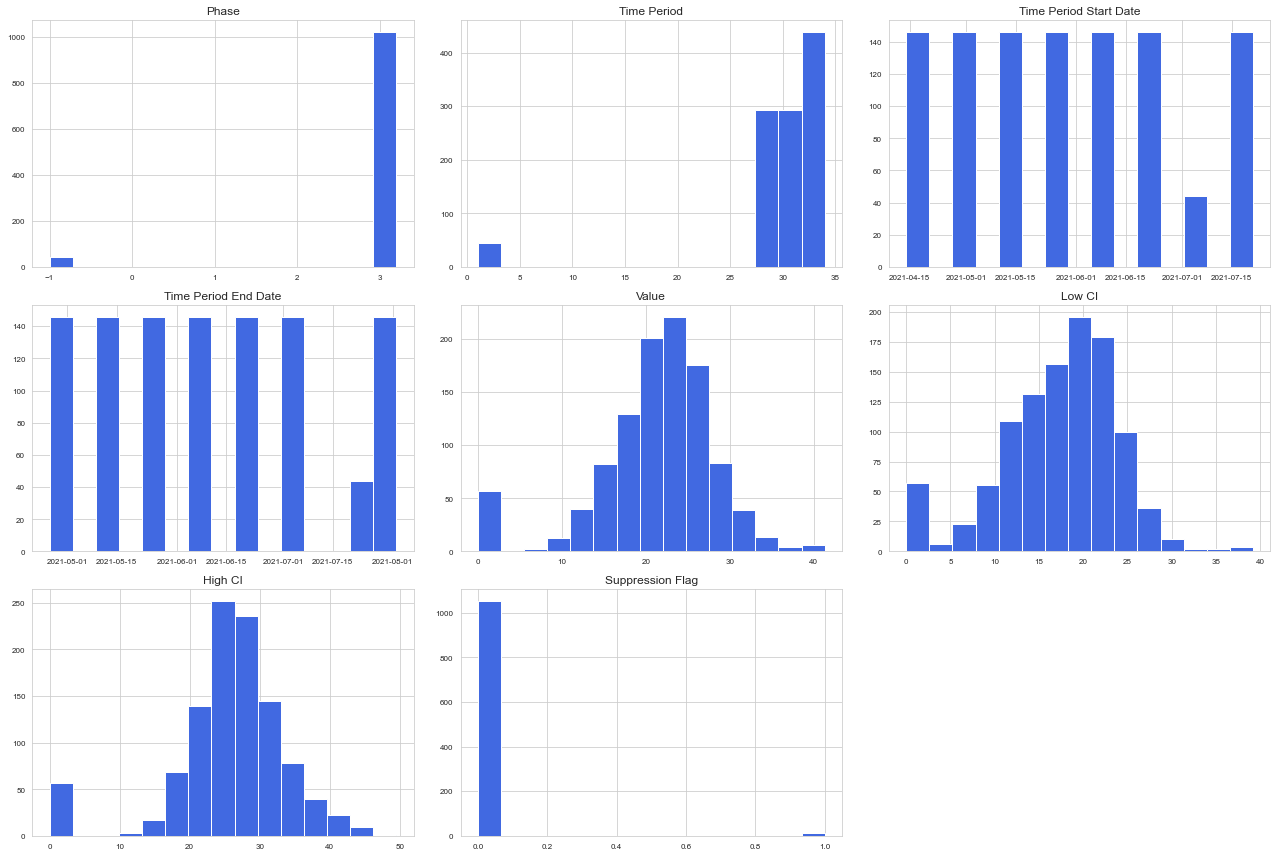

In [38]:
telmedData.hist(bins=15, color='royalblue', edgecolor='white', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=True)
# # command to give space b/t diff. plots 
plt.tight_layout(rect=(0, 0, 3, 3))

### Pairplot 2D Plotting

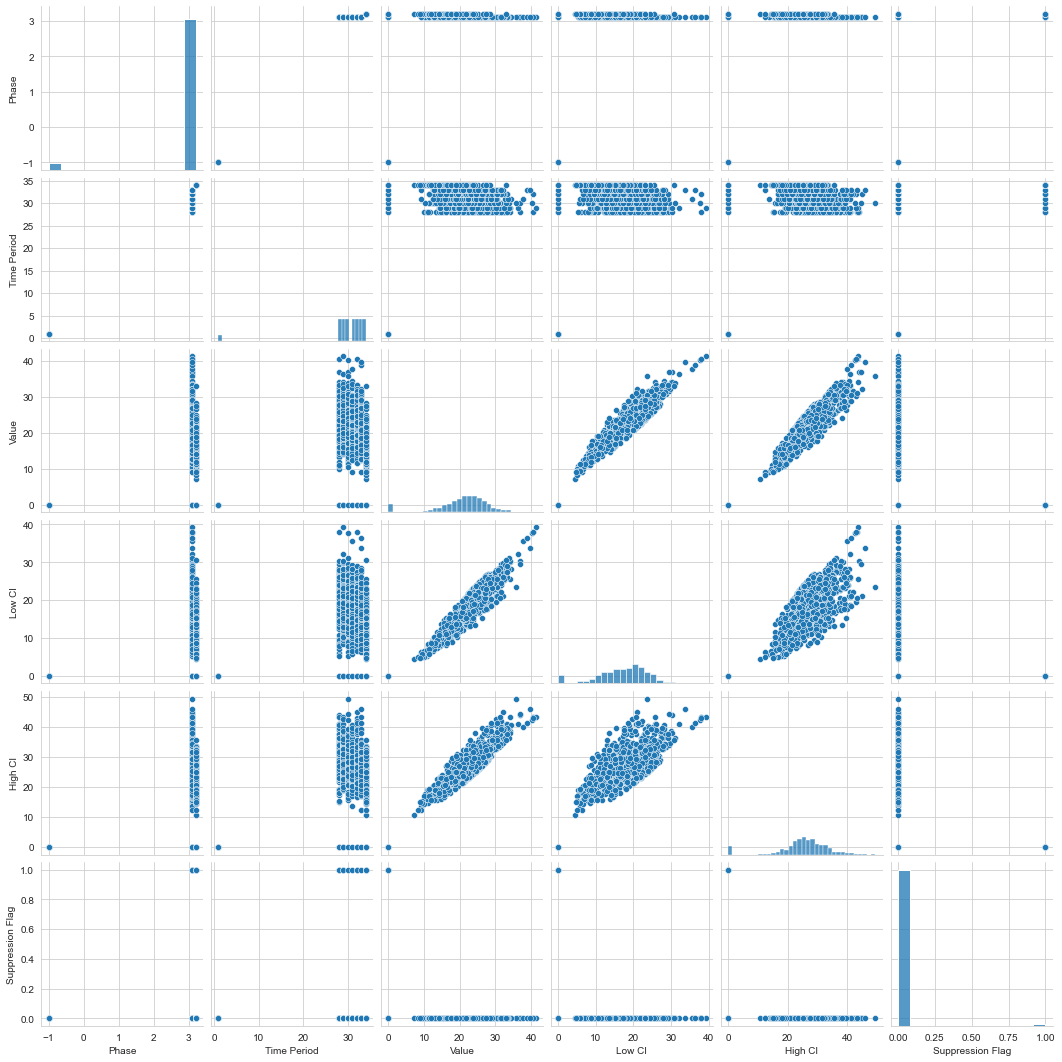

In [39]:
# sns.pairplot(telmedData)
sns.set_style("whitegrid");
sns.pairplot(telmedData);

#### Pairplot Observation
The data is more prominent and can be vastly analytical between High CI and Low CI, where we can see the plotting is more densed

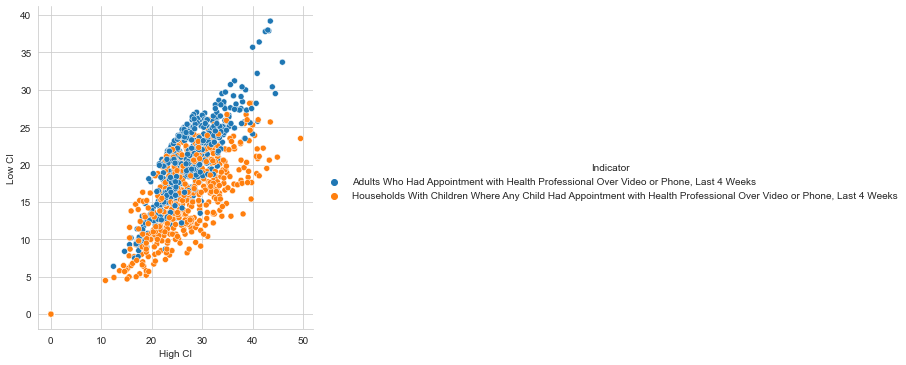

In [40]:
plt.close()
sns.relplot(x= 'High CI', y= 'Low CI', hue= 'Indicator', data= telmedData)

### Observation
1. High confident index in Children are higher
2. Adults who had appoints has Low Confident in telemedicine

### Plot Distribution

#### Histogram Based Data Analysis

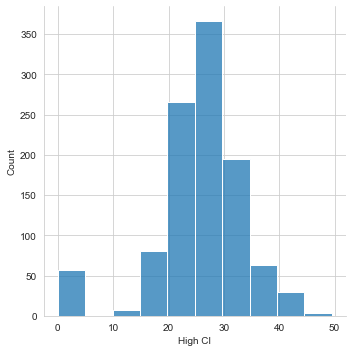

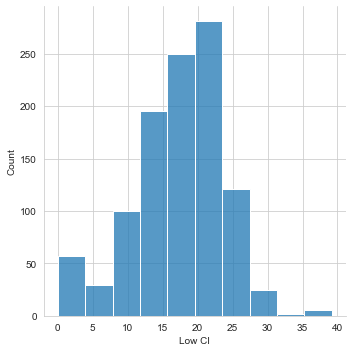

In [41]:
sns.displot(telmedData["High CI"], bins= 10)
plt.show()
sns.displot(telmedData["Low CI"], bins= 10)
plt.show()
plt.close()

#### Observations
1. Most High Confident Index data points are falling between 20 to 35 approx
2. Most Low Confident Index data points are falling between 10 to 27 approx
3. The density of Low CI is higher than High CI

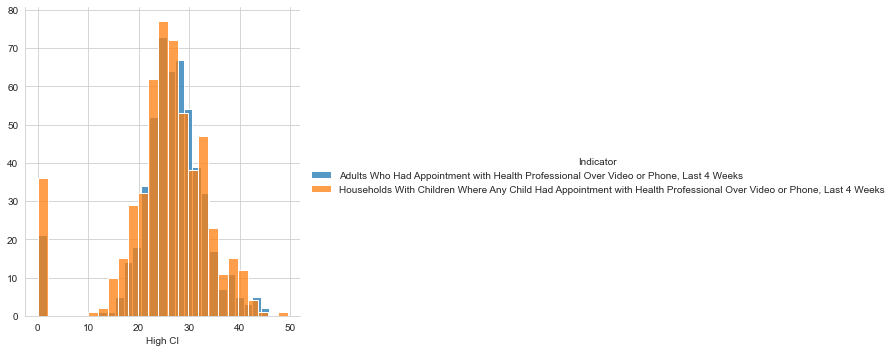

In [42]:
sns.FacetGrid(telmedData, hue="Indicator", height=5) \
   .map(sns.histplot, "High CI") \
   .add_legend();
plt.show();

#### Observations
1. Children are having more higher Confident Index than Adult who had appointments.
2. Both of them data points are ranging approx between 20-30 the most  

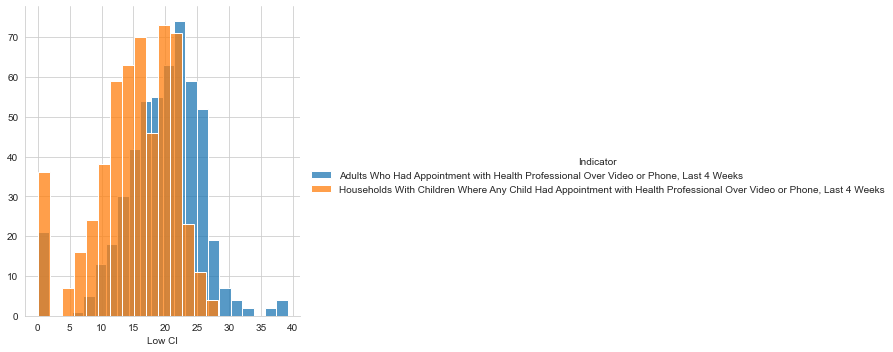

In [43]:
sns.FacetGrid(telmedData, hue="Indicator", height=5) \
   .map(sns.histplot, "Low CI") \
   .add_legend();
plt.show();
plt.close()

#### Observations
1. Adults who had appointments are having higher Low CI than Households with children
2. Here the higher data points are ranging approx between 10 - 27 the most
3. Even the frequencies of Low CI is higher in the Children.

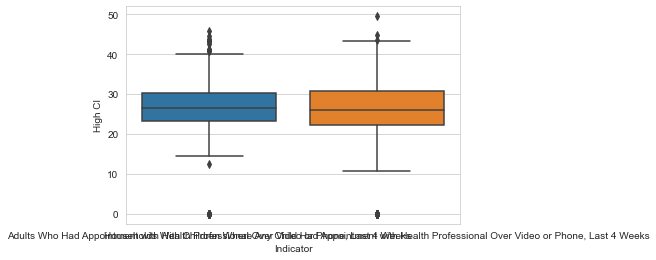

In [44]:
sns.boxplot(x='Indicator',y='High CI', data=telmedData)
plt.show()
plt.close()

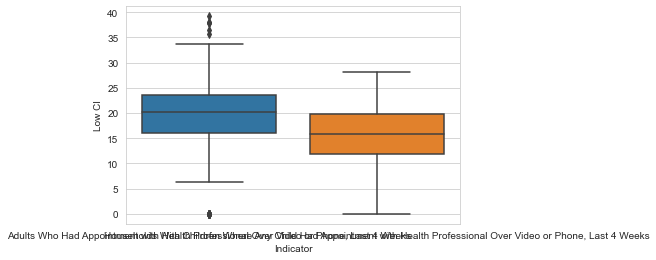

In [45]:
sns.boxplot(x='Indicator',y='Low CI', data=telmedData)
plt.show()
plt.close()

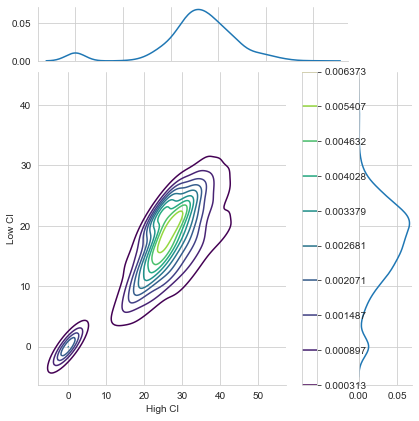

<Figure size 432x288 with 0 Axes>

In [46]:
#2D Density plot, contors-plot
sns.jointplot(x="High CI", y="Low CI", data=telmedData, kind="kde", cbar=True, cmap="viridis",
              marginal_ticks=True);
plt.show()
plt.savefig('joinplot_telemedicine.png')

#### Final Observation
Here in the jointplot and from the above plots it seems the data is High and Low Confident Index is too close and the High Confident Index is somewhere higher. So, finally it can be concluded that based on the last survey data the People in Household with children are more confident in the telemedicine consultation.